In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
sns.set()

In [2]:
standard = datetime.datetime(2023,7,4,18,1,36)

state=None
l=0
length=[0]
time = []
hourM = 60
for i in range(23):
    fname = "temphumid_" + standard.strftime("%Y%m%d") + "_" + standard.strftime("%H")+".csv"
    
    df1 = pd.read_csv(fname, engine="python")
    

    l = l + hourM
    length.append(l)
    time.append(standard.strftime("%H:%M"))

    
    state = pd.concat([state,df1])
    standard = standard + datetime.timedelta(hours=1)
    
time.append(standard.strftime("%H:%M"))


In [3]:
state['datetime']=pd.to_datetime(state[['year','month','day','hour','minute','second']])
state['hourminute']=state.hour+(state.minute/60)
state.head()

,year,month,day,hour,minute,second,temp,humid,heat index,datetime,hourminute
0,2023,7,4,18,1,36,21.0,68.0,67.51320,2023-07-04 18:01:36,18.016667
1,2023,7,4,18,2,36,21.1,68.0,67.66052,2023-07-04 18:02:36,18.033333
2,2023,7,4,18,3,36,21.1,68.0,67.66052,2023-07-04 18:03:36,18.050000
3,2023,7,4,18,4,36,21.0,68.0,67.51320,2023-07-04 18:04:36,18.066667
4,2023,7,4,18,5,36,21.0,68.0,67.51320,2023-07-04 18:05:36,18.083333


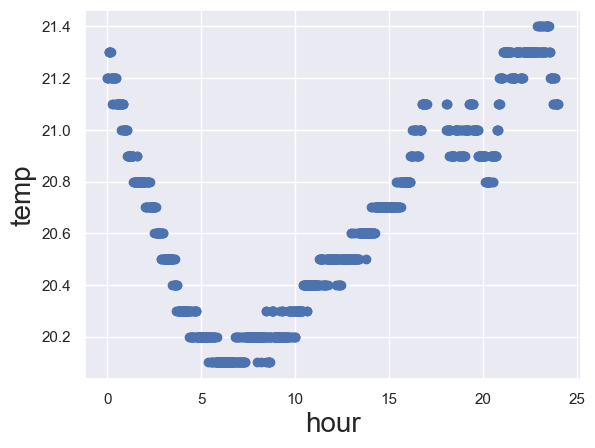

In [4]:
plt.scatter(state["hourminute"], state["temp"])
plt.xlabel("hour", fontsize=20)
plt.ylabel("temp", fontsize=20)
plt.show()

In [5]:
s_temp = np.array(state.temp)
s_humid = np.array(state.humid)


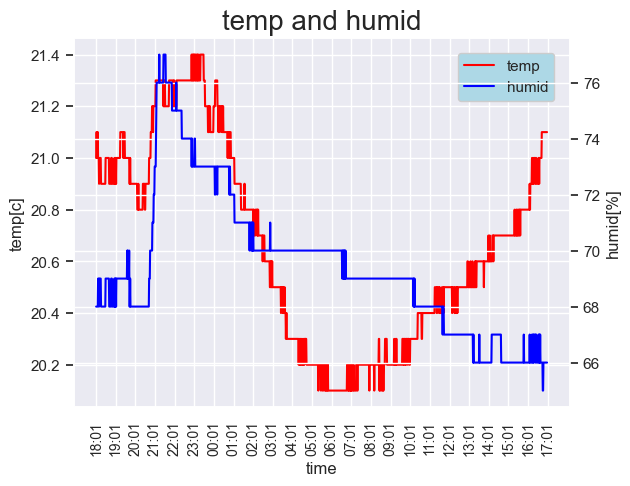

In [15]:
fig, ax1 = plt.subplots()


ax1.plot(s_temp, color="red", label="temp")
ax2 = ax1.twinx()
ax2.plot(s_humid, color="blue", label="humid")

plt.title("temp and humid", fontsize=20)

handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2, loc="upper right",
           borderaxespad=1., facecolor = "lightblue", framealpha=1)

ax1.set_xticks(length)
ax1.set_xticklabels(time, rotation=90, fontsize=10)

ax1.set_xlabel("time")
ax1.set_ylabel("temp[c]")
ax2.set_ylabel("humid[%]")
plt.show()